<a href="https://colab.research.google.com/github/jjindia/ML/blob/main/1_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn import linear_model, datasets, tree
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
%matplotlib inline

Linear regression
===================

Prepare data
First we will prepare some data for demonstrating linear regression. To keep things simple we will assume we have a single input feature. Let us use the following function to generate our data:
<br>
y = \frac{x}{2}+sin(x)+\epsilon
<br>
Where \epsilon \sim \mathcal{N}(0,1)
 is Gaussian noise.
 Ref: https://github.com/Santara/ML-MOOC-NPTEL/ 

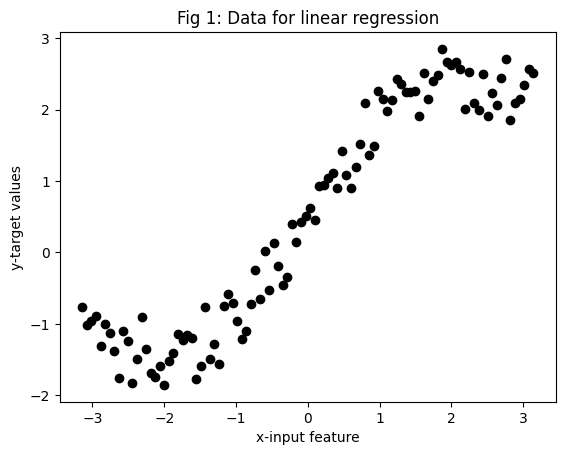

In [ ]:
number_of_samples = 100
x = np.linspace(-np.pi, np.pi, number_of_samples)
y = 0.5*x+np.sin(x)+np.random.random(x.shape)
plt.scatter(x,y,color='black') #Plot y-vs-x in dots
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 1: Data for linear regression')
plt.show()

In [ ]:
x

array([-3.14159265, -3.07812614, -3.01465962, -2.9511931 , -2.88772658,
       -2.82426006, -2.76079354, -2.69732703, -2.63386051, -2.57039399,
       -2.50692747, -2.44346095, -2.37999443, -2.31652792, -2.2530614 ,
       -2.18959488, -2.12612836, -2.06266184, -1.99919533, -1.93572881,
       -1.87226229, -1.80879577, -1.74532925, -1.68186273, -1.61839622,
       -1.5549297 , -1.49146318, -1.42799666, -1.36453014, -1.30106362,
       -1.23759711, -1.17413059, -1.11066407, -1.04719755, -0.98373103,
       -0.92026451, -0.856798  , -0.79333148, -0.72986496, -0.66639844,
       -0.60293192, -0.53946541, -0.47599889, -0.41253237, -0.34906585,
       -0.28559933, -0.22213281, -0.1586663 , -0.09519978, -0.03173326,
        0.03173326,  0.09519978,  0.1586663 ,  0.22213281,  0.28559933,
        0.34906585,  0.41253237,  0.47599889,  0.53946541,  0.60293192,
        0.66639844,  0.72986496,  0.79333148,  0.856798  ,  0.92026451,
        0.98373103,  1.04719755,  1.11066407,  1.17413059,  1.23

In [ ]:
y

array([-0.76947802, -1.01212847, -0.95267283, -0.88556526, -1.30515063,
       -1.00450073, -1.12580766, -1.38583432, -1.75498561, -1.10418516,
       -1.24514093, -1.82825209, -1.48884376, -0.89992776, -1.35632586,
       -1.68510174, -1.7423597 , -1.58500206, -1.85384283, -1.5239195 ,
       -1.41160026, -1.14393831, -1.21971625, -1.15126595, -1.20239892,
       -1.77319394, -1.58532541, -0.76190775, -1.49593681, -1.28325114,
       -1.56155946, -0.74783028, -0.58295757, -0.70794014, -0.95607913,
       -1.21780351, -1.09767014, -0.7280954 , -0.25011843, -0.64741265,
        0.02236333, -0.52745033,  0.12761993, -0.18479674, -0.45317229,
       -0.34237984,  0.39459064,  0.14729053,  0.42827559,  0.51445754,
        0.61890087,  0.45567121,  0.93138801,  0.9484871 ,  1.04700742,
        1.11604424,  0.9013288 ,  1.42507401,  1.0821363 ,  0.90328178,
        1.19873387,  1.52400428,  2.08454766,  1.3653021 ,  1.49510255,
        2.26399336,  2.14631928,  1.97825033,  2.13477045,  2.43

Split the dataset into training, validation and test sets
It is always encouraged in machine learning to split the available data into training, validation and test sets. The training set is supposed to be used to train the model. The model is evaluated on the validation set after every episode of training. The performance on the validation set gives a measure of how good the model generalizes. Various hyperparameters of the model are tuned to improve performance on the validation set. Finally when the model is completely optimized and ready for deployment, it is evaluated on the test data and the performance is reported in the final description of the model.

In this example we do a 
 random split of the data between the training, validation and test sets respectively.

In [ ]:
random_indices = np.random.permutation(number_of_samples)
#Training set
x_train = x[random_indices[:70]]
y_train = y[random_indices[:70]]
#Validation set
x_val = x[random_indices[70:85]]
y_val = y[random_indices[70:85]]
#Test set
x_test = x[random_indices[85:]]
y_test = y[random_indices[85:]]

# Fit a line to the data

Linear regression learns to fit a hyperplane to our data in the feature space. For one dimensional data, the hyperplane reduces to a straight line. We will fit a line to our data using sklearn.linear_model.LinearRegression

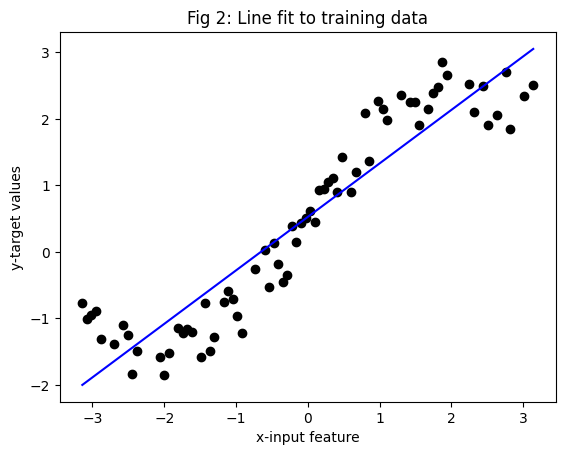

In [9]:
model = linear_model.LinearRegression() #Create a least squared error linear regression object

#sklearn takes the inputs as matrices. Hence we reshpae the arrays into column matrices
x_train_for_line_fitting = np.array(x_train.reshape(len(x_train),1))
y_train_for_line_fitting = np.array(y_train.reshape(len(y_train),1))
#Fit the line to the training data
model.fit(x_train_for_line_fitting, y_train_for_line_fitting)

#Plot the line
plt.scatter(x_train, y_train, color='black')
plt.plot(x.reshape((len(x),1)),model.predict(x.reshape((len(x),1))),color='blue')
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 2: Line fit to training data')
plt.show()

Check the details of the model

In [14]:
print("Slope", model.coef_)
print("Y intercept", model.intercept_)
model.get_params()

Slope [[0.8038833]]
Y intercept [0.52678448]


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [21]:
print("Test 1:",model.predict(np.array([[0]])) )
print("Test 2:",model.predict(np.array([[1]])) )

Test 1: [[0.52678448]]
Test 2: [[1.33066779]]


# Evaluate the model
Now that we have our model ready, we must evaluate our model. In a linear regression scenario, its common to evaluate the model in terms of the mean squared error on the validation and test sets.

In [23]:
mean_val_error = np.mean( (y_val - model.predict(x_val.reshape(len(x_val),1)))**2 )
mean_test_error = np.mean( (y_test - model.predict(x_test.reshape(len(x_test),1)))**2 )

print( 'Validation MSE: ', mean_val_error, '\nTest MSE: ', mean_test_error)

Validation MSE:  5.58177885954513 
Test MSE:  5.741492626963272


# Ridge regression
Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients with l2 regularization.